# Intro to Bayesian Statistics Lab

Complete the following set of exercises to solidify your knowledge of Bayesian statistics and Bayesian data analysis.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Cookie Problem

Suppose we have two bowls of cookies. Bowl 1 contains 30 vanilla cookies and 10 chocolate cookies. Bowl 2 contains 20 of each. You randomly pick one cookie out of one of the bowls, and it is vanilla. Use Bayes Theorem to calculate the probability that the vanilla cookie you picked came from Bowl 1?

In [2]:
def bayes_rule(priors, likelihoods):
    marg = sum(np.multiply(priors, likelihoods))
    post = np.divide(np.multiply(priors, likelihoods), marg)
    return post

In [7]:
bowls = [1/2,1/2]
vanilla = [3/4,1/2]
bayes_rule(bowls,vanilla)[0]

0.6

What is the probability that it came from Bowl 2?

In [8]:
bayes_rule(bowls,vanilla)[1]

0.4

What if the cookie you had picked was chocolate? What are the probabilities that the chocolate cookie came from Bowl 1 and Bowl 2 respectively?

In [11]:
chocolate = [1/4,1/2]
print('The probability for bowls 1 and 2 respectively given that a chocolate cookie was selected is: ', bayes_rule(bowls,chocolate)[0],'and',bayes_rule(bowls,chocolate)[1])

The probability for bowls 1 and 2 respectively given that a chocolate cookie was selected is:  0.3333333333333333 and 0.6666666666666666


## 2. Candy Problem

Suppose you have two bags of candies:

- In Bag 1, the mix of colors is:
    - Brown - 30%
    - Yellow - 20%
    - Red - 20%
    - Green - 10%
    - Orange - 10%
    - Tan - 10%
    
- In Bag 2, the mix of colors is:
    - Blue - 24%
    - Green - 20%
    - Orange - 16%
    - Yellow - 14%
    - Red - 13%
    - Brown - 13%
    
Not knowing which bag is which, you randomly draw one candy from each bag. One is yellow and one is green. What is the probability that the yellow one came from the Bag 1?

*Hint: For the likelihoods, you will need to multiply the probabilities of drawing yellow from one bag and green from the other bag and vice versa.*

In [14]:
bags = [1/2,1/2]
yellow_green = [0.2*0.2,0.14*0.1]
bayes_rule(bags,yellow_green)[0]

0.7407407407407408

What is the probability that the yellow candy came from Bag 2?

In [15]:
bayes_rule(bags,yellow_green)[1]

0.25925925925925924

What are the probabilities that the green one came from Bag 1 and Bag 2 respectively?

In [16]:
green_yellow = [0.1*0.14,0.2*0.2]
print('The probability for bags 1 and 2 respectively given that a green candy was selected is: ', bayes_rule(bowls,green_yellow)[0],'and',bayes_rule(bowls,green_yellow)[1])

The probability for bags 1 and 2 respectively given that a green candy was selected is:  0.25925925925925924 and 0.7407407407407408


## 3. Monty Hall Problem

Suppose you are a contestant on the popular game show *Let's Make a Deal*. The host of the show (Monty Hall) presents you with three doors - Door A, Door B, and Door C. He tells you that there is a sports car behind one of them and if you choose the correct one, you win the car!

You select Door A, but then Monty makes things a little more interesting. He opens Door B to reveal that there is no sports car behind it and asks you if you would like to stick with your choice of Door A or switch your choice to Door C. Given this new information, what are the probabilities of you winning the car if you stick with Door A versus if you switch to Door C?

In [18]:
doors = [1/3,1/3] #We only inlcude two because door B was opened, so we only need to choose between sticking with A or changing to B
likelihoods = [1/2,1] # If door A has the car, there is a 50% chance that door B closes, but if door C has the car, there is a 100% chance that door B closes

print('The probability that the door we first picked has the car is: ', bayes_rule(doors,likelihoods)[0],'\nThe probablity the door we did not pick has the car is:',bayes_rule(doors,likelihoods)[1])




The probability that the door we first picked has the car is:  0.3333333333333333 
The probablity the door we did not pick has the car is: 0.6666666666666666


## 4. Bayesian Analysis 

Suppose you work for a landscaping company, and they want to advertise their service online. They create an ad and sit back waiting for the money to roll in. On the first day, the ad sends 100 visitors to the site and 14 of them sign up for landscaping services. Create a generative model to come up with the posterior distribution and produce a visualization of what the posterior distribution would look like given the observed data.

<AxesSubplot:>

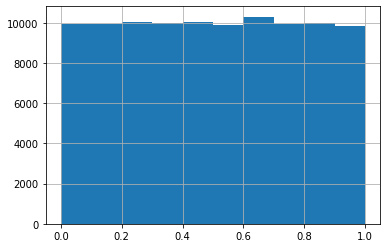

In [20]:
n_draws = 100000
prior = pd.Series(np.random.uniform(0, 1, size=n_draws))
prior.hist()

In [22]:
observed = 14
sent = 100
def generative_model(total, param):
    result = np.random.binomial(total, param)
    return result

In [23]:
sim_data = list()
for p in prior:
    sim_data.append(generative_model(sent, p))

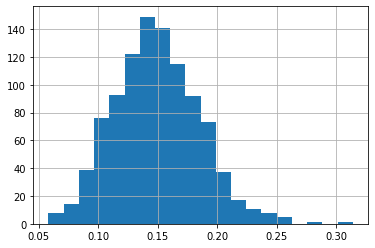

In [30]:
posterior = prior[list(map(lambda x: x == observed, sim_data))]
posterior.hist(bins=20)
plt.show()

Produce a set of descriptive statistics for the posterior distribution.

In [31]:
posterior.describe()

count    1002.000000
mean        0.149226
std         0.035683
min         0.058137
25%         0.125364
50%         0.147549
75%         0.172607
max         0.313763
dtype: float64

What is the 90% credible interval range?

In [33]:
print(posterior.quantile(.05), '|', posterior.quantile(.95))

0.09473667090562456 | 0.20689888634331832


What is the Maximum Likelihood Estimate?

In [34]:
rounded = posterior.round(2)
mode = rounded.mode()[0]
probability = list(rounded).count(mode)/len(rounded)
print('Maximum Likelihood Estimate: ', mode, '|',probability)

Maximum Likelihood Estimate:  0.15 | 0.12075848303393213
